<a href="https://colab.research.google.com/github/BeUnique21/titanic_classifier/blob/main/Titanic_Classifiier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Libraries and Load Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('train.csv')  # Update with your dataset path


**Step 2: Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


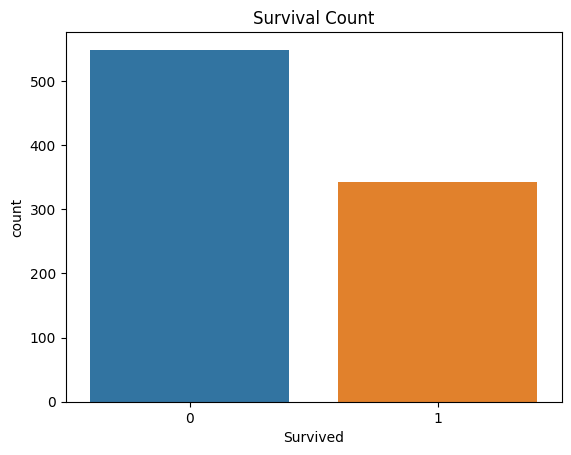

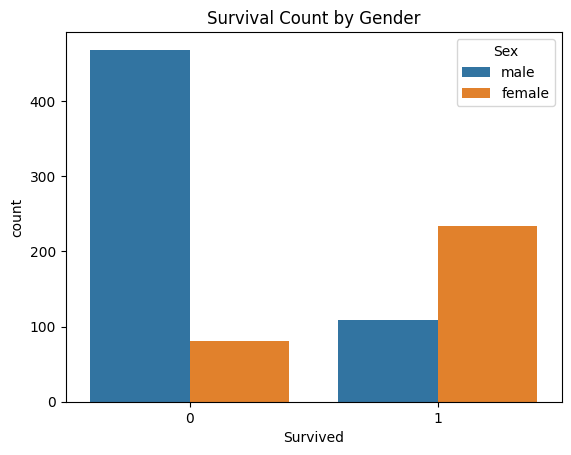

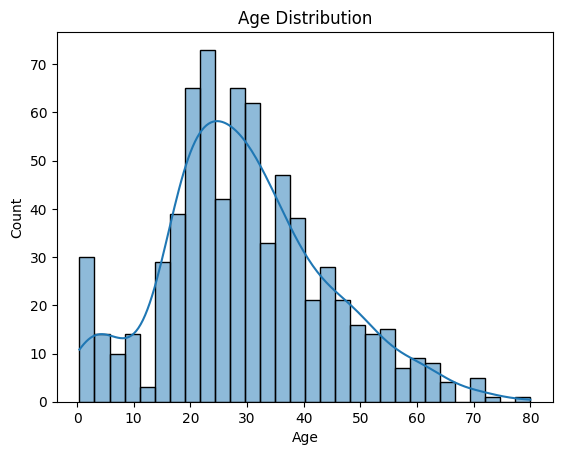

In [ ]:
# Check data info
print(data.info())

# Visualize survival count
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

# Visualize survival count based on gender
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Count by Gender')
plt.show()

# Explore age distribution
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


**Step 3: Data Preprocessing**

In [ ]:
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
# Perform other necessary preprocessing steps
# ...

# Feature Engineering - converting categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])
# ...

# Define features and target variable
features = ['Pclass', 'Age', 'Sex_female', 'Sex_male', 'Fare']  # Example features
target = 'Survived'

# Split data into train and test sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Step 4: Model Training and Evaluation**

In [ ]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7932960893854749


**Step 5: Interactive Prediction with User Input**

In [ ]:
def predict_survival(model, scaler):
    # Take user input
    pclass = int(input("Enter passenger's class (1, 2, or 3): "))
    age = float(input("Enter passenger's age: "))
    sex = input("Enter passenger's gender (male or female): ")
    fare = float(input("Enter passenger's fare: "))

    # Convert input to the format used for prediction
    gender = 1 if sex.lower() == 'female' else 0
    passenger = np.array([pclass, age, 1 - gender, gender, fare]).reshape(1, -1)
    passenger = scaler.transform(passenger)

    # Predict survival
    prediction = model.predict(passenger)
    if prediction == 1:
        print("The passenger is predicted to survive.")
    else:
        print("The passenger is predicted to not survive.")


# Use the function for prediction
predict_survival(model, scaler)


Enter passenger's class (1, 2, or 3): 1
Enter passenger's age: 42
Enter passenger's gender (male or female): male
Enter passenger's fare: 23
The passenger is predicted to survive.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
